### Data Preprocessing

               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849
date        object
Ex_rate    float64
dtype: object
(7588, 2)
date       0
Ex_rate    0
dtype: int64


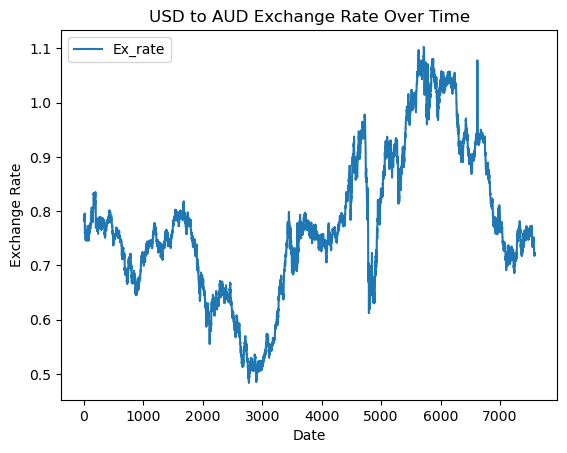

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv(r"C:\Users\USER\Downloads\exchange_rate.csv",parse_dates=True ) #Parse_dates- reads dates as dates only
print(df.head())
print(df.dtypes)
print(df.shape)
print(df.isnull().sum())
df.plot() #Line chart
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [2]:
#Set date as index
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df.set_index('date', inplace=True) 
print(df.index)
df = df.sort_index()
ts = df['Ex_rate']
df.head()# time series column

DatetimeIndex(['1990-01-01', '1990-01-02', '1990-01-03', '1990-01-04',
               '1990-01-05', '1990-01-06', '1990-01-07', '1990-01-08',
               '1990-01-09', '1990-01-10',
               ...
               '2010-10-01', '2010-10-02', '2010-10-03', '2010-10-04',
               '2010-10-05', '2010-10-06', '2010-10-07', '2010-10-08',
               '2010-10-09', '2010-10-10'],
              dtype='datetime64[ns]', name='date', length=7588, freq=None)


,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


#### ADFuller test

In [14]:
#To know whether plot is stationary or not - ADFuller test
#H0- Process is non-stationary
#H1- Process is stationary

from statsmodels.tsa.stattools import adfuller

result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print('Critical values', result[4])

ADF Statistic: -1.664994180738078
p-value: 0.44923273535982894
Critical values {'1%': np.float64(-3.4312123140180137), '5%': np.float64(-2.861921078147796), '10%': np.float64(-2.5669728434336108)}


In [15]:
#Apply differencing
ts_diff = ts.diff().dropna()
adf_test(ts_diff)

{'ADF Statistic': np.float64(-99.39343120118623),
 'p-value': 0.0,
 'Critical values': {'1%': np.float64(-3.4312123140180137),
  '5%': np.float64(-2.861921078147796),
  '10%': np.float64(-2.5669728434336108)}}

##### Parameter Selection for ARIMA

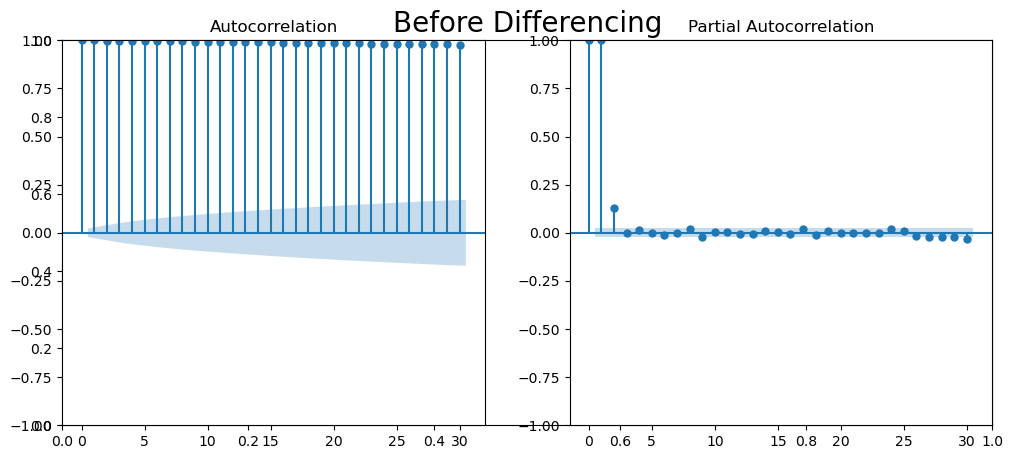

In [21]:
#d = 1
# Plot ACF and PACF for parameter estimation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  

plt.figure(figsize=(12,5))
plt.title("Before Differencing", fontsize=20)
plt.subplot(121)
plot_acf(ts, lags=30, ax=plt.gca())
plt.subplot(122)
plot_pacf(ts, lags=30, ax=plt.gca())
plt.show()


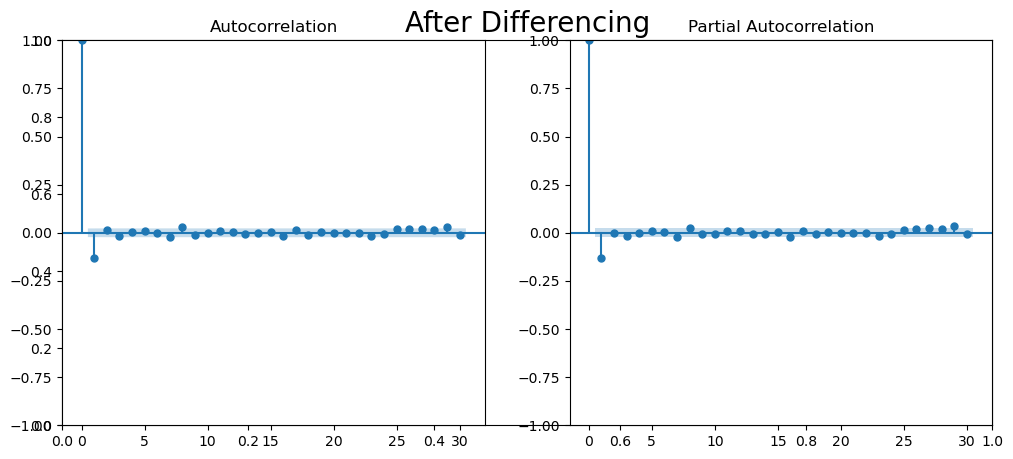

In [22]:
#d = 1
# Plot ACF and PACF for parameter estimation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  

plt.figure(figsize=(12,5))
plt.title("After Differencing", fontsize=20)
plt.subplot(121)
plot_acf(ts_diff, lags=30, ax=plt.gca())
plt.subplot(122)
plot_pacf(ts_diff, lags=30, ax=plt.gca())
plt.show()


In [23]:
#Data split
ts = df["Ex_rate"]

train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

#### Build ARIMA model

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE  : 0.1777
RMSE : 0.2054
MAPE : 22.80%


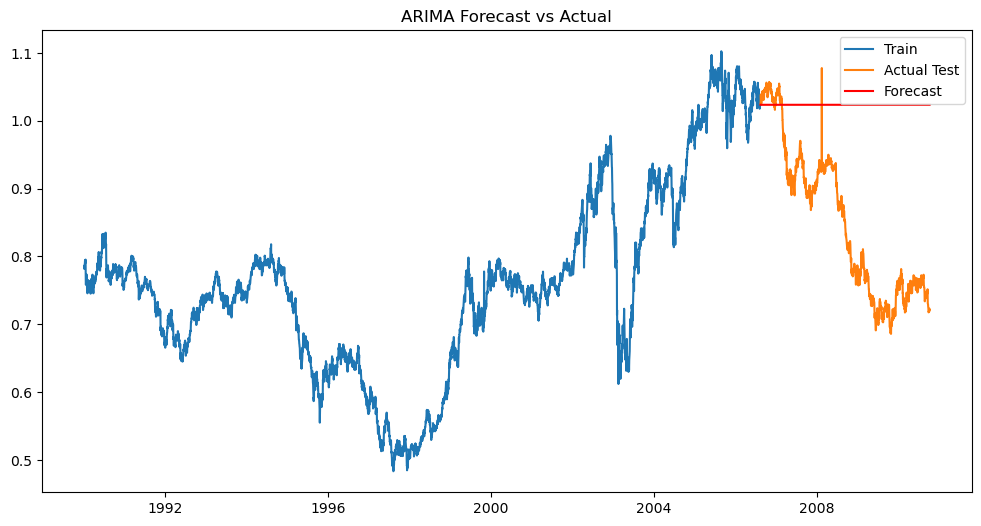

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA


# Fit ARIMA model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Forecast
forecast_arima = model_fit.forecast(steps=len(test))

# Evaluation metrics (version-safe)
mae = mean_absolute_error(test, forecast_test)
rmse = np.sqrt(mean_squared_error(test, forecast_test))
mape = np.mean(np.abs((test - forecast_test) / test)) * 100

print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAPE : {mape:.2f}%")

# Plot
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual Test')
plt.plot(test.index, forecast_test, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()


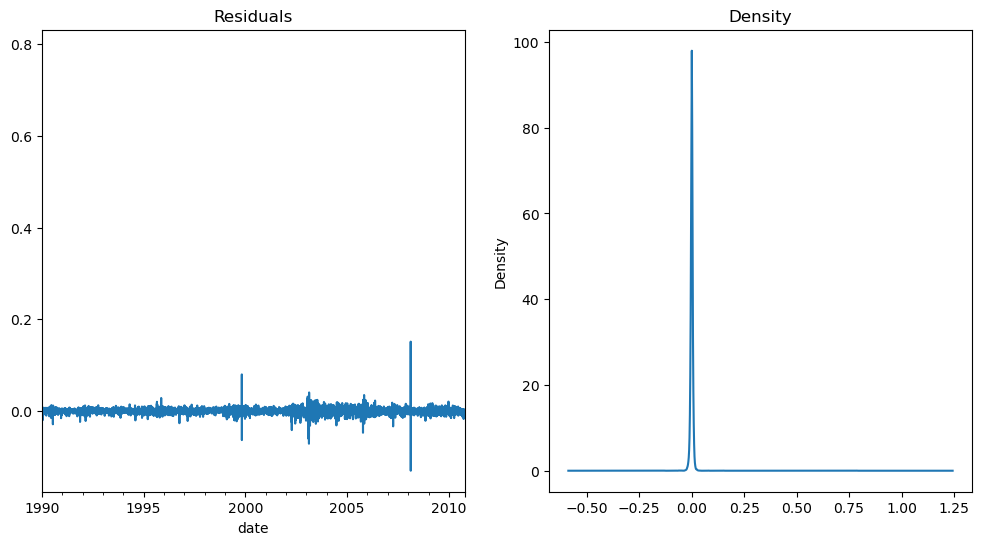

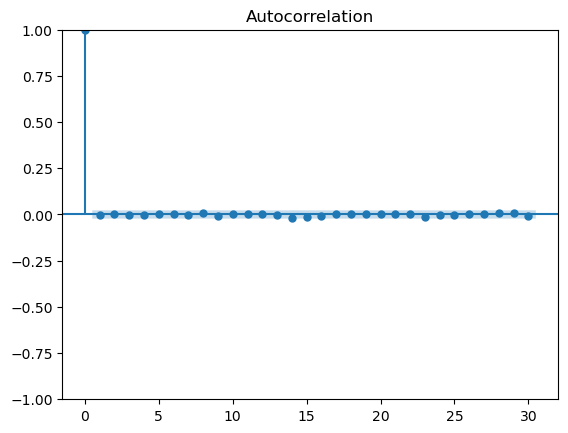

In [29]:
# Residuals
residuals = arima_model_fit.resid

plt.figure(figsize=(12,6))
plt.subplot(121)
residuals.plot(title='Residuals', ax=plt.gca())
plt.subplot(122)
residuals.plot(kind='kde', title='Density', ax=plt.gca())
plt.show()

# ACF of residuals to check for remaining autocorrelation
plot_acf(residuals, lags=30)
plt.show()


In [30]:
#Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_es = ExponentialSmoothing(
    train,
    trend='add',
    seasonal=None
)

es_fit = model_es.fit()


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


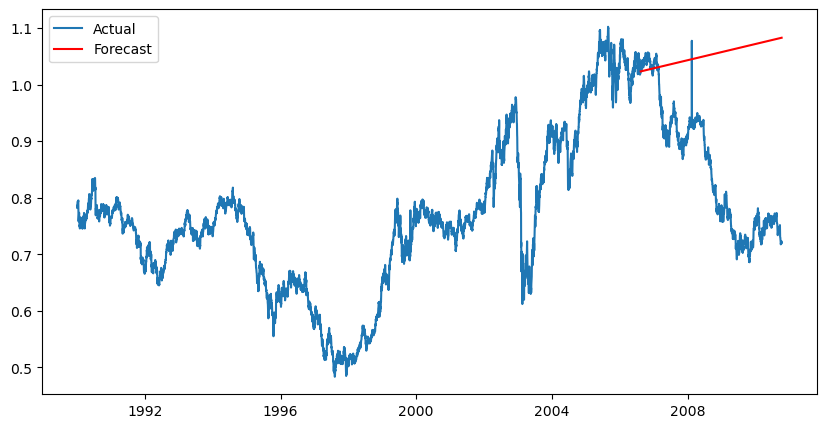

In [31]:
forecast_es = es_fit.forecast(steps=len(test))


plt.figure(figsize=(10,5))
plt.plot(df, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()

ARIMA -> MAE: 0.1777097044912133 RMSE: 0.20543669659669261 MAPE: 22.79796617381153
ES   -> MAE: 0.20659619216588007 RMSE: 0.23910443281197072 MAPE: 26.508663930344888


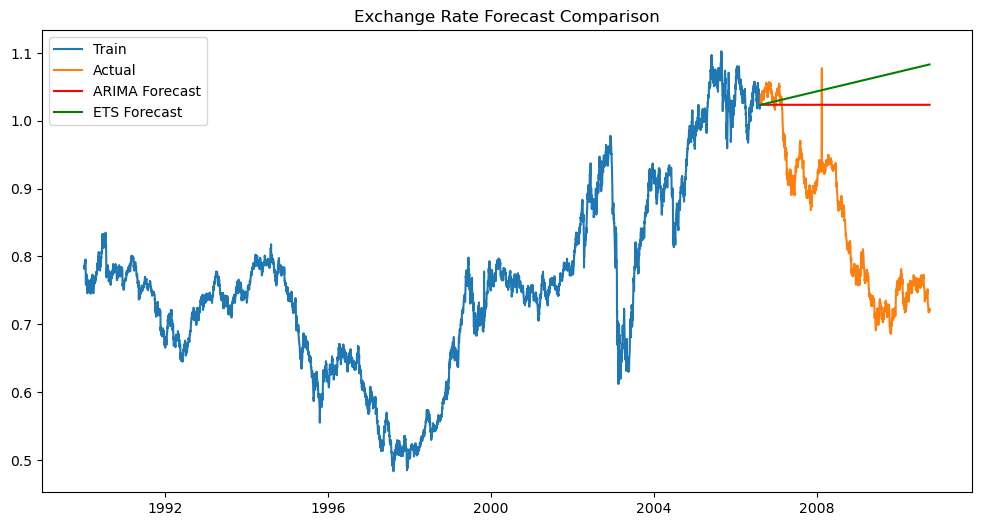

In [34]:
#Evaluation
#ARIMA model and ExponentialSmoothing model

# Error metrics
#Evaluation metrics
def evaluate(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape


arima_mae, arima_rmse, arima_mape = evaluate(test, forecast_arima)
es_mae, es_rmse, es_mape = evaluate(test, forecast_es)

print("ARIMA -> MAE:", arima_mae, "RMSE:", arima_rmse, "MAPE:", arima_mape)
print("ES   -> MAE:", es_mae, "RMSE:", es_rmse, "MAPE:", es_mape)


#Comparing Forecast vs actual (and arima vs es)
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, forecast_arima, label="ARIMA Forecast", color="red")
plt.plot(test.index, forecast_es, label="ETS Forecast", color="green")
plt.legend()
plt.title("Exchange Rate Forecast Comparison")
plt.show()


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred)/y_true)) * 100
    return mae, rmse, mape

print("ARIMA:", metrics(test, forecast_arima))
print("Exp Smoothing:", metrics(test, forecast_es))


ARIMA: (0.1777097044912133, np.float64(0.20543669659669261), np.float64(22.79796617381153))
Exp Smoothing: (0.20659619216588007, np.float64(0.23910443281197072), np.float64(26.508663930344888))
